In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tqdm

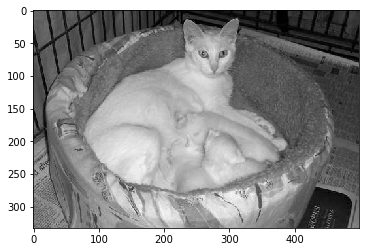

In [2]:
DataDirectory = "dataset/train_set"

categories = ["cats", "dogs"]
for categorie in categories:
    path = os.path.join(DataDirectory,categorie)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        
        break  # we just want one for now so break
    break  #...and one more!


In [3]:
print(img_array)

[[ 84  84  84 ...  30  29  28]
 [ 84  84  84 ...  36  35  34]
 [ 84  84  84 ...  36  35  34]
 ...
 [ 98  78  78 ... 106 106 106]
 [ 72  99 117 ... 106 106 106]
 [ 89 117 119 ... 106 106 106]]


In [4]:
print(img_array.shape)

(333, 499)


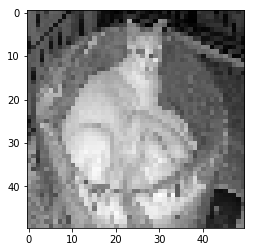

In [5]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(DataDirectory,categorie)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            

create_training_data()

print(len(training_data))

8004


In [7]:
testing_data = []
DataDirectory2 = "dataset/test_set"
def create_testing_data():
    for category in categories:
        path = os.path.join(DataDirectory2,categorie)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                testing_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            

create_testing_data()

print(len(testing_data))

2000


In [8]:
import random
random.shuffle(training_data)
random.shuffle(testing_data)

In [9]:
print("sample shuffeled dataset :")
for sample in training_data[:10]:
    print(sample[1])

sample shuffeled dataset :
0
0
1
1
1
1
0
0
1
0


In [10]:
X1 = []
y1 = []

for features,label in training_data:
    X1.append(features)
    y1.append(label)
X1 = np.array(X1).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

X2 = []
y2 = []

for features,label in testing_data:
    X2.append(features)
    y2.append(label)
X2 = np.array(X2).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [11]:
import pickle

pickle_out = open("X1.pickle","wb")
pickle.dump(X1, pickle_out)
pickle_out.close()

pickle_out = open("y1.pickle","wb")
pickle.dump(y1, pickle_out)
pickle_out.close()

pickle_out = open("X2.pickle","wb")
pickle.dump(X2, pickle_out)
pickle_out.close()

pickle_out = open("y2.pickle","wb")
pickle.dump(y2, pickle_out)
pickle_out.close()

pickle_out = open("test.pickle","wb")
pickle.dump(testing_data, pickle_out)
pickle_out.close()

In [12]:
pickle_in = open("X1.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y1.pickle","rb")
y = pickle.load(pickle_in)

print(y[:50])

[0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0]
